## **Libraries to be installed beforehand**

In [170]:
# !pip3 install openpyxl
# !pip3 install xlrd

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import string
import pickle
import xlrd

from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# from sklearn.svm import LinearSVC
# from sklearn.ensemble import RandomForestClassifier


## **Reading dataset using openpyxl engine since xlrd is now discontinued**

In [4]:
dataset = pd.read_excel('dataset/dataset.xlsx', engine='openpyxl')
# dataset = pd.read_excel('dataset.xlsx')

In [5]:
dataset.head()

,URL,Text,Sentiment
0,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS


**Cleaning and analysing dataset and its sturcture**

In [174]:
dataset.isnull().sum()

URL          0
Text         0
Sentiment    0
dtype: int64

In [175]:
dataset.drop('URL', axis='columns', inplace=True)

In [176]:
dataset.head()

,Text,Sentiment
0,Girlfight follows a project dwelling New York ...,POS
1,Hollywood North is an euphemism from the movie...,POS
2,That '70s Show is definitely the funniest show...,POS
3,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,"A series of random, seemingly insignificant th...",POS


In [177]:
print(f'Rows: {dataset.shape[0]}\nColumns: {dataset.shape[1]}')

Rows: 1999
Columns: 2


In [178]:
print(f'Columns Names: {list(dataset.columns)}')

Columns Names: ['Text', 'Sentiment']


### **Tokenization of sentences**

In [179]:
nlp = English()
stopwords = list(STOP_WORDS)
punctuations = string.punctuation

In [180]:
def tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

### **Transform and vectorization**

In [181]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [182]:
vectorizer = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,1)) 
tfvectorizer = TfidfVectorizer(tokenizer = tokenizer)

### **Dataset splitting**

In [183]:
X = dataset['Text']
y = dataset['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

## **Bernoulli Naïve Bayes (BNB)**

In [184]:
from sklearn.naive_bayes import BernoulliNB


In [185]:
classifier = BernoulliNB()
BNBmodel = Pipeline([("cleaner", predictors()), ('vectorizer', vectorizer), ('classifier', classifier)])

BNBmodel.fit(X_train,y_train)
BNBpred=BNBmodel.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,BNBpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,BNBpred)}')
print(f'Accuracy: {accuracy_score(y_test, BNBpred) * 100}%')
prec = precision_score(y_test, BNBpred, average='macro') * 100
print(f'Precision: {prec}%')
rec = recall_score(y_test, BNBpred, average='macro') * 100
print(f'Recall: {rec}%')
pickle.dump(BNBmodel, open('BernoulliNB_model.sav', 'wb'))
print('Bernoulli NB trained Model Saved')

Confusion Matrix:
[[173  22]
 [ 32 173]]

Classification Report:
              precision    recall  f1-score   support

         NEG       0.84      0.89      0.87       195
         POS       0.89      0.84      0.87       205

    accuracy                           0.86       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.86      0.86       400

Accuracy: 86.5%
Precision: 86.55409631019386%
Recall: 86.55409631019386%
Bernoulli NB trained Model Saved


## **Multinomial Naïve Bayes (MNB)**

In [186]:
from sklearn.naive_bayes import MultinomialNB



In [187]:
classifier = MultinomialNB()
MNBmodel = Pipeline([("cleaner", predictors()), ('vectorizer', vectorizer), ('classifier', classifier)])

MNBmodel.fit(X_train,y_train)
MNBpred=BNBmodel.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,MNBpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,MNBpred)}')
print(f'Accuracy: {accuracy_score(y_test,MNBpred)*100}%')
prec = precision_score(y_test, MNBpred, average='macro') * 100
print(f'Precision: {prec}%')
rec = recall_score(y_test, MNBpred, average='macro') * 100
print(f'Recall: {rec}%')
pickle.dump(MNBmodel, open('MultinomialNB_model.sav', 'wb'))
print('Multinomial NB trained Model Saved')

Confusion Matrix:
[[173  22]
 [ 32 173]]

Classification Report:
              precision    recall  f1-score   support

         NEG       0.84      0.89      0.87       195
         POS       0.89      0.84      0.87       205

    accuracy                           0.86       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.86      0.86       400

Accuracy: 86.5%
Precision: 86.55409631019386%
Recall: 86.55409631019386%
Multinomial NB trained Model Saved


## **Maximum Entropy (ME)**

In [188]:
from sklearn.linear_model import LogisticRegression


In [189]:
classifier = LogisticRegression()
LRmodel = Pipeline([("cleaner", predictors()), ('vectorizer', vectorizer), ('classifier', classifier)])

# Train the Model
LRmodel.fit(X_train,y_train)   
LRpred = LRmodel.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,LRpred)}')
print(f'Accuracy: {accuracy_score(y_test,LRpred)*100}%')
prec = precision_score(y_test, LRpred, average='macro') * 100
print(f'Precision: {prec}%')
rec = recall_score(y_test, LRpred, average='macro') * 100
print(f'Recall: {rec}%')
pickle.dump(LRmodel, open('LinearRegression_model.sav', 'wb'))
print('Logistic Regression trained Model Saved')

Confusion Matrix:
[[169  26]
 [ 34 171]]

Classification Report:
              precision    recall  f1-score   support

         NEG       0.83      0.87      0.85       195
         POS       0.87      0.83      0.85       205

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

Accuracy: 85.0%
Precision: 85.02663099197319%
Recall: 85.04065040650406%
Logistic Regression trained Model Saved


In [190]:
# Another random review
pre = LRmodel.predict(["Production has an incredibly important place to shoot a series or film. Sometimes even a very minimalist story can reach an incredibly successful point after the right production stages. The Witcher series is far from minimalist. The Witcher is one of the best Middle-earth works in the world. Production quality is essential if you want to handle such a topic successfully."])
print(f'Prediction: {pre[0]}')

Prediction: POS


## **Decision Tree (DE)**

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [192]:
dt_clf = DecisionTreeClassifier()
dt_model = Pipeline([("cleaner", predictors()), ('vectorizer', vectorizer), ('classifier', dt_clf)])

# Train the Model
dt_model.fit(X_train,y_train)   
dt_pred = dt_model.predict(X_test)

In [193]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}')
print(f'\nClassification Report:\n{classification_report(y_test,dt_pred)}')
print(f'Accuracy: {accuracy_score(y_test,dt_pred)*100}%')
prec = precision_score(y_test, dt_pred, average='macro') * 100
print(f'Precision: {prec}%')
rec = recall_score(y_test, dt_pred, average='macro') * 100
print(f'Recall: {rec}%')
pickle.dump(dt_model, open('DecisionTree_model.sav', 'wb'))
print('Decision Tree trained Model Saved')

Confusion Matrix:
[[167  28]
 [ 35 170]]

Classification Report:
              precision    recall  f1-score   support

         NEG       0.83      0.86      0.84       195
         POS       0.86      0.83      0.84       205

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

Accuracy: 84.25%
Precision: 84.26592659265926%
Recall: 84.28392745465916%
Decision Tree trained Model Saved


## **Support Vector Machine (SVM)**

In [194]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report
# pipeline and standard scalar are already imported

In [195]:
%%time
#Train the model
# Perform classification with SVM, kernel=linear
SVMclassifier = svm.SVC(kernel='linear')
SVMmodel = Pipeline([("cleaner", predictors()), ('vectorizer', vectorizer), ('classifier', SVMclassifier)])
SVMmodel.fit(X_train,y_train)
SVMpred = SVMmodel.predict(X_test)

CPU times: user 9.99 s, sys: 23.1 ms, total: 10 s
Wall time: 10.1 s


In [196]:
# report= classification_report(y_test, SVMpred, output_dict=True) 
# print(report['NEG'])
# print(report['POS'])
# print(SVMpred)
# np.unique(SVMpred)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,SVMpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,SVMpred)}')
print(f'Accuracy: {accuracy_score(y_test,SVMpred)*100}%')
prec = precision_score(y_test, SVMpred, average='macro') * 100
print(f'Precision: {prec}%')
rec = recall_score(y_test, SVMpred, average='macro') * 100
print(f'Recall: {rec}%')
pickle.dump(SVMmodel, open('SVM_model.sav', 'wb'))
print('SVM trained Model Saved')

Confusion Matrix:
[[168  27]
 [ 33 172]]

Classification Report:
              precision    recall  f1-score   support

         NEG       0.84      0.86      0.85       195
         POS       0.86      0.84      0.85       205

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

Accuracy: 85.0%
Precision: 85.00712517812946%
Recall: 85.02814258911819%
SVM trained Model Saved


In [197]:
# Another random review
pre = SVMmodel.predict(["Production has an incredibly important place to shoot a series or film. Sometimes even a very minimalist story can reach an incredibly successful point after the right production stages. The Witcher series is far from minimalist. The Witcher is one of the best Middle-earth works in the world. Production quality is essential if you want to handle such a topic successfully."])
print(f'Prediction: {pre[0]}')

Prediction: POS


## **Results comparision plots and tables**

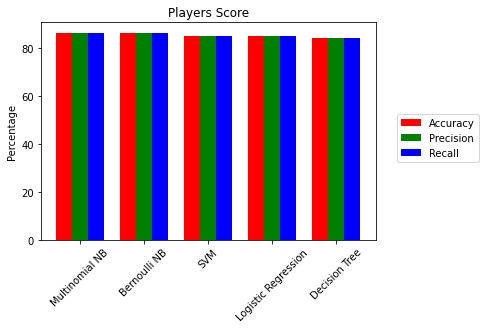

In [199]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
  
acc = [86.5, 86.5, 85, 85, 84.25]
bar1 = plt.bar(ind, acc, width, color = 'r')
  
prec = [86.5, 86.5, 85, 85, 84.28]
bar2 = plt.bar(ind+width, prec, width, color='g')
  
recall = [86.5, 86.5, 85, 85, 84.26]
bar3 = plt.bar(ind+width*2, recall, width, color = 'b')
  
# plt.xlabel("Dates")
plt.ylabel("Percentage")
plt.title("Comparison")
  
plt.xticks(ind+width,['Multinomial NB','Bernoulli NB','SVM','Logistic Regression', 'Decision Tree'])
plt.xticks(rotation = 45)
plt.legend( (bar1, bar2, bar3), ('Accuracy', 'Precision', 'Recall'), bbox_to_anchor = (1.05, 0.6))
plt.show()

U = true positive \\
V = false positive \\
X = true negative \\
Y = false positive \\

<table>
   <thead>
      <tr>
         <th>Method</th>
         <th>U</th>
         <th>V</th>
         <th>X</th>
         <th>Y</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Multinomial NB</th>
         <td>173</td>
         <td>32</td>
         <td>173</td>
         <td>22</td>
      </tr>
      <tr>
         <th>Bernoulli NB</th>
         <td>173</td>
         <td>32</td>
         <td>173</td>
         <td>22</td>
      </tr>
      <tr>
         <th>SVM</th>
         <td>172</td>
         <td>33</td>
         <td>168</td>
         <td>27</td>
      </tr>
      <tr>
         <th>Maximum Entropy</th>
         <td>171</td>
         <td>34</td>
         <td>169</td>
         <td>26</td>
      </tr>
      <tr>
         <th>Decision Tree</th>
         <td>170</td>
         <td>35</td>
         <td>167</td>
         <td>28</td>
      </tr>
   </tbody>
</table>

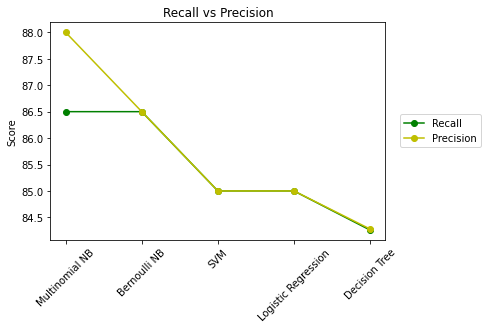

In [214]:
import matplotlib.pyplot as plt
models = ['Multinomial NB','Bernoulli NB','SVM','Logistic Regression', 'Decision Tree']
recall = [86.5, 86.5, 85, 85, 84.26]
precision = [88, 86.5, 85, 85, 84.28]
line_chart1 = plt.plot(models, recall, 'o-g')
line_chart2 = plt.plot(models, precision, 'o-y')
plt.title('Recall vs Precision')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.legend(['Recall', 'Precision'], bbox_to_anchor = (1.3, 0.6))
plt.show()